# Import pkgs

In [1]:
import torch
import os
import sys
from pathlib import Path

# --- Start of the robust path modification ---
try:
    # This variable is defined in VS Code notebooks
    current_file_path = Path(__vsc_ipynb_file__)
except NameError:
    # Fallback for other environments or .py scripts
    current_file_path = Path.cwd()

# Traverse up to find the project root
# We assume the project root contains a known directory, e.g., 'Deps' or a marker file like '.git'
project_root = current_file_path
while not (project_root / 'Deps').exists() and project_root.parent != project_root:
    project_root = project_root.parent

# Add project root to the Python path if it's not already there
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print(f"Project Root: {project_root}")
print(f"Current Working Directory: {os.getcwd()}")

os.environ['CUDA_VISIBLE_DEVICES'] = '2'
print('Pytorch version :', torch.__version__)
print('CUDA version\t:', torch.version.cuda)
print('GPU\t\t:',torch.cuda.get_device_name())

Project Root: /workspace
Current Working Directory: /workspace/B01_figures
Pytorch version : 2.0.1+cu117
CUDA version	: 11.7
GPU		: NVIDIA A40


In [2]:
from collections import OrderedDict, Counter
from Deps.CustomFuctions.classes import IMAGENET2012_CLASSES
import torchvision
from A01_ImageNet import model, utils, data
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset
import scipy.io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import matplotlib.patches as mpatches
from torch import nn
from pywaffle import Waffle
from scipy.spatial.distance import jensenshannon
from pypalettes import load_cmap
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as st
import scipy.stats
from scipy import stats

# Load data

## ImageNet hypercategory

In [3]:
imagenet1k_hypercategory = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "hypercategory", 
        "imagenet1k_hypercategory_v2.pt"
    )
)

## ImageNet results

In [4]:
# ==================== base ====================
# 30 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails.pt"
    )
)

# 30 * 1
acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails.pt"
    )
)

# ==================== ViT ====================
# 5 * 1
acc_list_imagenet1k_ss20_fixfe_vit_b_16_mlp3_hidden100_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_vit_b_16_mlp3_hidden100_initrandom_alltrails.pt"
    )
)

# ==================== ss 10 ====================
# 5 * 1
acc_list_imagenet1k_ss10_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss10_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails.pt"
    )
)

# ==================== ss 100 ====================
# 5 * 1
acc_list_imagenet1k_ss100_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss100_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails.pt"
    )
)

# ==================== layer 1 ====================
# 5 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp1_hidden100_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp1_hidden100_initrandom_alltrails.pt"
    )
)

# ==================== layer 5 ====================
# 5 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp5_hidden100_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp5_hidden100_initrandom_alltrails.pt"
    )
)

# ==================== joint ====================
# 5 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_jointTrue_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_jointTrue_initrandom_alltrails.pt"
    )
)

# ==================== fix ts ====================
# 5 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixtsTrue_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixtsTrue_initrandom_alltrails.pt"
    )
)

# ==================== fix tsca ====================
# 5 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixtscaTrue_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixtscaTrue_initrandom_alltrails.pt"
    )
)

# ==================== fix symbol random ====================
# 5 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initrandom_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initrandom_alltrails.pt"
    )
)

# ==================== fix symbol word2vec ====================
# 5 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initword2vec_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initword2vec_alltrails.pt"
    )
)

# ==================== fix symbol one-hot ====================
# 5 * 1
acc_list_imagenet1k_ss1000_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initone_hot_alltrails = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss1000_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initone_hot_alltrails.pt"
    )
)

# ==================== case study ====================
# 1000 * 1
acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50 = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50.pt"
    )
)

# 1000 * 1
acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50 = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "accuracy_list", 
        "acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50.pt"
    )
)

## CIFAR100 results

In [5]:
cifar_df = pd.read_excel(
    os.path.join(
        project_root, 
        "Results", 
        "single_ct_acc.xlsx"
    )
)
cifar100_mani_acc = list(cifar_df['best_acc_1'].values)
cifar100_comm_acc = list(cifar_df['best_acc_2'].values)
cifar100_wordvec_acc = list(cifar_df['best_acc_wordvector'].values)

## THINGS results

In [12]:
things_df = pd.read_csv(
    os.path.join(
        project_root,
        "Results",
        "THINGS_detailed_results.csv"
    )
)
things_49dim_acc = list(things_df['accuracy'].values)

## RSA results

### Concept layer

In [6]:
Concept_VOTC_df = pd.read_csv(
    os.path.join(
        project_root, 
        "Results",
        "Concept_results.csv"
    )
)

# Filter for Concept and group, then extract PartialCorrelation --------------------
concept_pcorr_votc = list(Concept_VOTC_df['PartialCorrelation'].values)
concept_pcorr_interest = Concept_VOTC_df[
    (Concept_VOTC_df['Kmeans_partial_group'] == 'interest')
]['PartialCorrelation'].tolist()
concept_pcorr_uninterest = Concept_VOTC_df[
    (Concept_VOTC_df['Kmeans_partial_group'] == 'uninterest')
]['PartialCorrelation'].tolist()

# Filter for Concept and group, then extract binder_rho_fishZ --------------------
concept_binder_rho = list(Concept_VOTC_df['binder_rho_fishZ'].values)
concept_rho_interest = Concept_VOTC_df[
    (Concept_VOTC_df['Kmeans_partial_group'] == 'interest')
]['binder_rho_fishZ'].tolist()
concept_rho_uninterest = Concept_VOTC_df[
    (Concept_VOTC_df['Kmeans_partial_group'] == 'uninterest')
]['binder_rho_fishZ'].tolist()

### CA layers

In [7]:
CA_control_df = pd.read_csv(
    os.path.join(
        project_root, 
        "Results",
        "CA_results.csv"
    )
)

# Filter for CA1 and Semantic Control, then extract Correlation --------------------
ca1_semantic_corr = CA_control_df[
    (CA_control_df['Layer'] == 'cdp1') & 
    (CA_control_df['ROIName'] == 'Reslice3mm_Binary_Jackson2021_semantic_control_ALE_result')
]['Correlation'].tolist()

# Filter for CA1 and General Control, then extract Correlation
ca1_general_corr = CA_control_df[
    (CA_control_df['Layer'] == 'cdp1') & 
    (CA_control_df['ROIName'] == 'Reslice3mm_Binary_Federenko2013_MultiDemand_ROI')
]['Correlation'].tolist()

# Filter for CA2 and Semantic Control, then extract Correlation --------------------
ca2_semantic_corr = CA_control_df[
    (CA_control_df['Layer'] == 'cdp2') & 
    (CA_control_df['ROIName'] == 'Reslice3mm_Binary_Jackson2021_semantic_control_ALE_result')
]['Correlation'].tolist()

# Filter for CA2 and General Control, then extract Correlation
ca2_general_corr = CA_control_df[
    (CA_control_df['Layer'] == 'cdp2') & 
    (CA_control_df['ROIName'] == 'Reslice3mm_Binary_Federenko2013_MultiDemand_ROI')
]['Correlation'].tolist()

# Filter for CA3 and Semantic Control, then extract Correlation --------------------
ca3_semantic_corr = CA_control_df[
    (CA_control_df['Layer'] == 'cdp3') & 
    (CA_control_df['ROIName'] == 'Reslice3mm_Binary_Jackson2021_semantic_control_ALE_result')
]['Correlation'].tolist()

# Filter for CA3 and General Control, then extract Correlation
ca3_general_corr = CA_control_df[
    (CA_control_df['Layer'] == 'cdp3') & 
    (CA_control_df['ROIName'] == 'Reslice3mm_Binary_Federenko2013_MultiDemand_ROI')
]['Correlation'].tolist()

## Semantic model results

In [8]:
Concept_bindersub_df = pd.read_csv(
    os.path.join(
        project_root, 
        "Results",
        "wt_subdomain_partialcorr.csv"
    )
)

# Concept for all 
concept_bindersub_rho = []
for i in range(2, len(Concept_bindersub_df.columns)):
    concept_bindersub_rho.append(Concept_bindersub_df.iloc[:, i].tolist())

# Color Card

In [9]:
blue_hex = ['#d4e8ed', '#c1dce5', '#add4e5', '#96cae0', '#80c1d7', '#70bbd6', '#65bbd3', '#458da3']
purple_hex = ['#f4ecf4', '#d7c3df', '#b8a8cf', '#b396c8', '#9384be', '#734c81']
GREY_LIGHT = "#b4aea9"
GREY_DARK = "#747473"
GREY50 = "#7F7F7F"
waffle_hex = ['#ADD4E5', '#E7BCC6', '#F8C9C1', '#C0BBBE', '#BAC8E1']

# Fig 2aa - Acc of each classes, trail50

## histogram - trained CDP/TS

In [10]:
def interval_to_str(interval):
    start = interval.left
    end = interval.right
    if interval.closed_left:
        start_bracket = '['
    else:
        start_bracket = '('
    if interval.closed_right:
        end_bracket = ']'
    else:
        end_bracket = ')'
    return f"{start:.2f}~{end:.2f}"

min_val = min(
    min(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50), 
    min(acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50)
)
max_val = max(
    max(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50), 
    max(acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50)
)
interval_length = 0.02

bins = np.arange(min_val - interval_length, max_val, interval_length)

learned_concept_df = pd.cut(
    acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50, 
    bins, right=True, include_lowest=False).value_counts().sort_index()
random_concept_df = pd.cut(
    acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail50, 
    bins, right=True, include_lowest=False).value_counts().sort_index()

learned_concept_df = learned_concept_df.reset_index()
learned_concept_df.columns = ['interval', 'count']

random_concept_df = random_concept_df.reset_index()
random_concept_df.columns = ['interval', 'count']

learned_concept_df['interval_str'] = learned_concept_df['interval'].apply(interval_to_str)
random_concept_df['interval_str'] = random_concept_df['interval'].apply(interval_to_str)


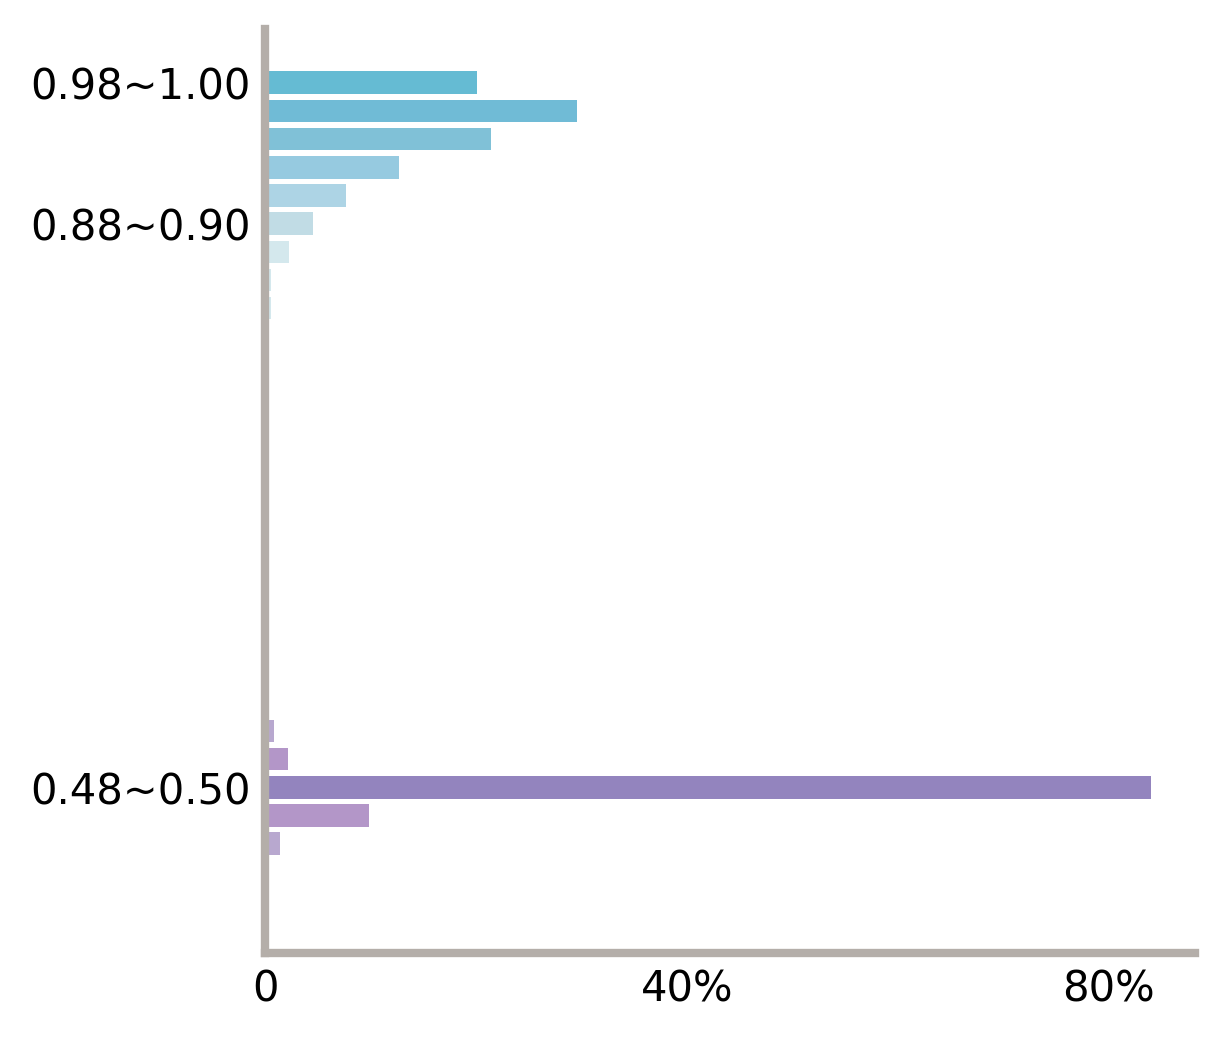

In [11]:
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

# Define colors to use for each bar
color_learned = [
    blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0],
    blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0],
    blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0],
    blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0],
    blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[0], blue_hex[1],
    blue_hex[2], blue_hex[3], blue_hex[4], blue_hex[5], blue_hex[6],
]

color_random = [
    purple_hex[0], purple_hex[1], purple_hex[2], purple_hex[3], purple_hex[4], 
    purple_hex[3], purple_hex[2], purple_hex[1], purple_hex[0], purple_hex[0],
    purple_hex[0], purple_hex[0], purple_hex[0], purple_hex[0], purple_hex[0],
    purple_hex[0], purple_hex[0], purple_hex[0], purple_hex[0], purple_hex[0],
    purple_hex[0], purple_hex[0], purple_hex[0], purple_hex[0], purple_hex[0],
    purple_hex[0], purple_hex[0], purple_hex[0], purple_hex[0], purple_hex[0],
]

# Create the plot
ax.barh(
    learned_concept_df['interval_str'], 
    learned_concept_df['count'],
    color = color_learned, # colors that we want
    label='Learned Concepts'
)

# Create the plot
ax.barh(
    random_concept_df['interval_str'], 
    random_concept_df['count'],
    color = color_random, # colors that we want
    label='Random Concepts'
)

# Removes spines
ax.spines[['right', 'top']].set_visible(False)

# Add a vertical grey line at the relative position
ax.grid(
    linestyle='-', # type of lines
    alpha=0.0, # opacity
    axis='x', # specify that we only want vertical lines
)

ax.tick_params(axis='x', labelcolor=(0, 0, 0, 1), length = 0)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticks([0, 400, 800])
ax.set_xticklabels(['0', '40%', '80%'])

ax.tick_params(axis='y', labelcolor=(0, 0, 0, 1), length = 0)
specific_ticks = [29, 24, 4]
ax.set_yticks(specific_ticks)

ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)


# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures",
#         "outputs",
#         "fig_2aa.eps"
#     ), 
#     format="eps", 
#     bbox_inches='tight'
# )
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures",
#         "outputs",
#         "fig_2aa.png"
#     ), 
#     format="png", 
#     bbox_inches='tight'
# )

plt.show()

In [ ]:
y_ticks = ax.get_yticks()  
y_labels = ax.get_yticklabels()  

for tick, label in zip(y_ticks, y_labels):
    print(f"y axis position: {tick}, range: {label.get_text()}")

# Fig 2ab - Acc of all classes, 30 trails

## bar + paired scatter

In [ ]:
# Sample data
# 30 * 1
group1 = np.array(acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails)
group2 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails)

# Create a DataFrame
data_30trails = pd.DataFrame({'Group1': group1, 'Group2': group2})

# Calculate means and standard errors
means = data_30trails.mean()

bar_width = 0.6
# Generate small random jitter
jitter = bar_width / 2

HLINES = [0.5, 1.0]

# Plot
fig, ax = plt.subplots(figsize = (4, 4), dpi=300)

# Bar plot with error bars
ax.bar([0, 1], means, color=[purple_hex[3], blue_hex[5]], alpha=0.5, capsize=1, width=bar_width)
x1 = np.zeros(len(group1)) + np.random.uniform(-jitter, jitter, len(group1))
x2 = np.ones(len(group2)) + np.random.uniform(-jitter, jitter, len(group2))
# Pairing data points and drawing lines with jitter
for i in range(data_30trails.shape[0]):
    x1_i = x1[i]
    x2_i = x2[i]
    ax.plot([x1_i, x2_i], data_30trails.iloc[i], color='gray', alpha=0.5)

# Scatter plot of individual data points with jitter
ax.scatter(x1, group1, color=purple_hex[5], edgecolors='white', linewidth=0.8, zorder=3)
ax.scatter(x2, group2, color=blue_hex[7], edgecolors='white', linewidth=0.8, zorder=3)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Customizing the plot
ax.set_xticks([0, 1])
ax.set_xticklabels(['Random', 'Learned'], fontsize = 20)
# ax.tick_params(axis='x', labelrotation=45)
# for tick in ax.get_xticklabels():
#     tick.set_horizontalalignment('right')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0.3, 1.0)
# ax.text(0.5, 1, 'Accuracy of all models', ha='center', va='bottom', fontsize=12)
# Removes spines
ax.spines[['right', 'top']].set_visible(False)

ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(4)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(4)

ax.tick_params(length=0, labelcolor=(0, 0, 0, 1))
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=20)

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures",
#         "outputs",
#         "fig_2ab.eps"
#     ), 
#     format="eps", 
#     bbox_inches='tight'
# )
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures",
#         "outputs",
#         "fig_2ab.png"
#     ), 
#     format="png", 
#     bbox_inches='tight'
# )

plt.show()


/tmp/ipykernel_109805/228563615.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


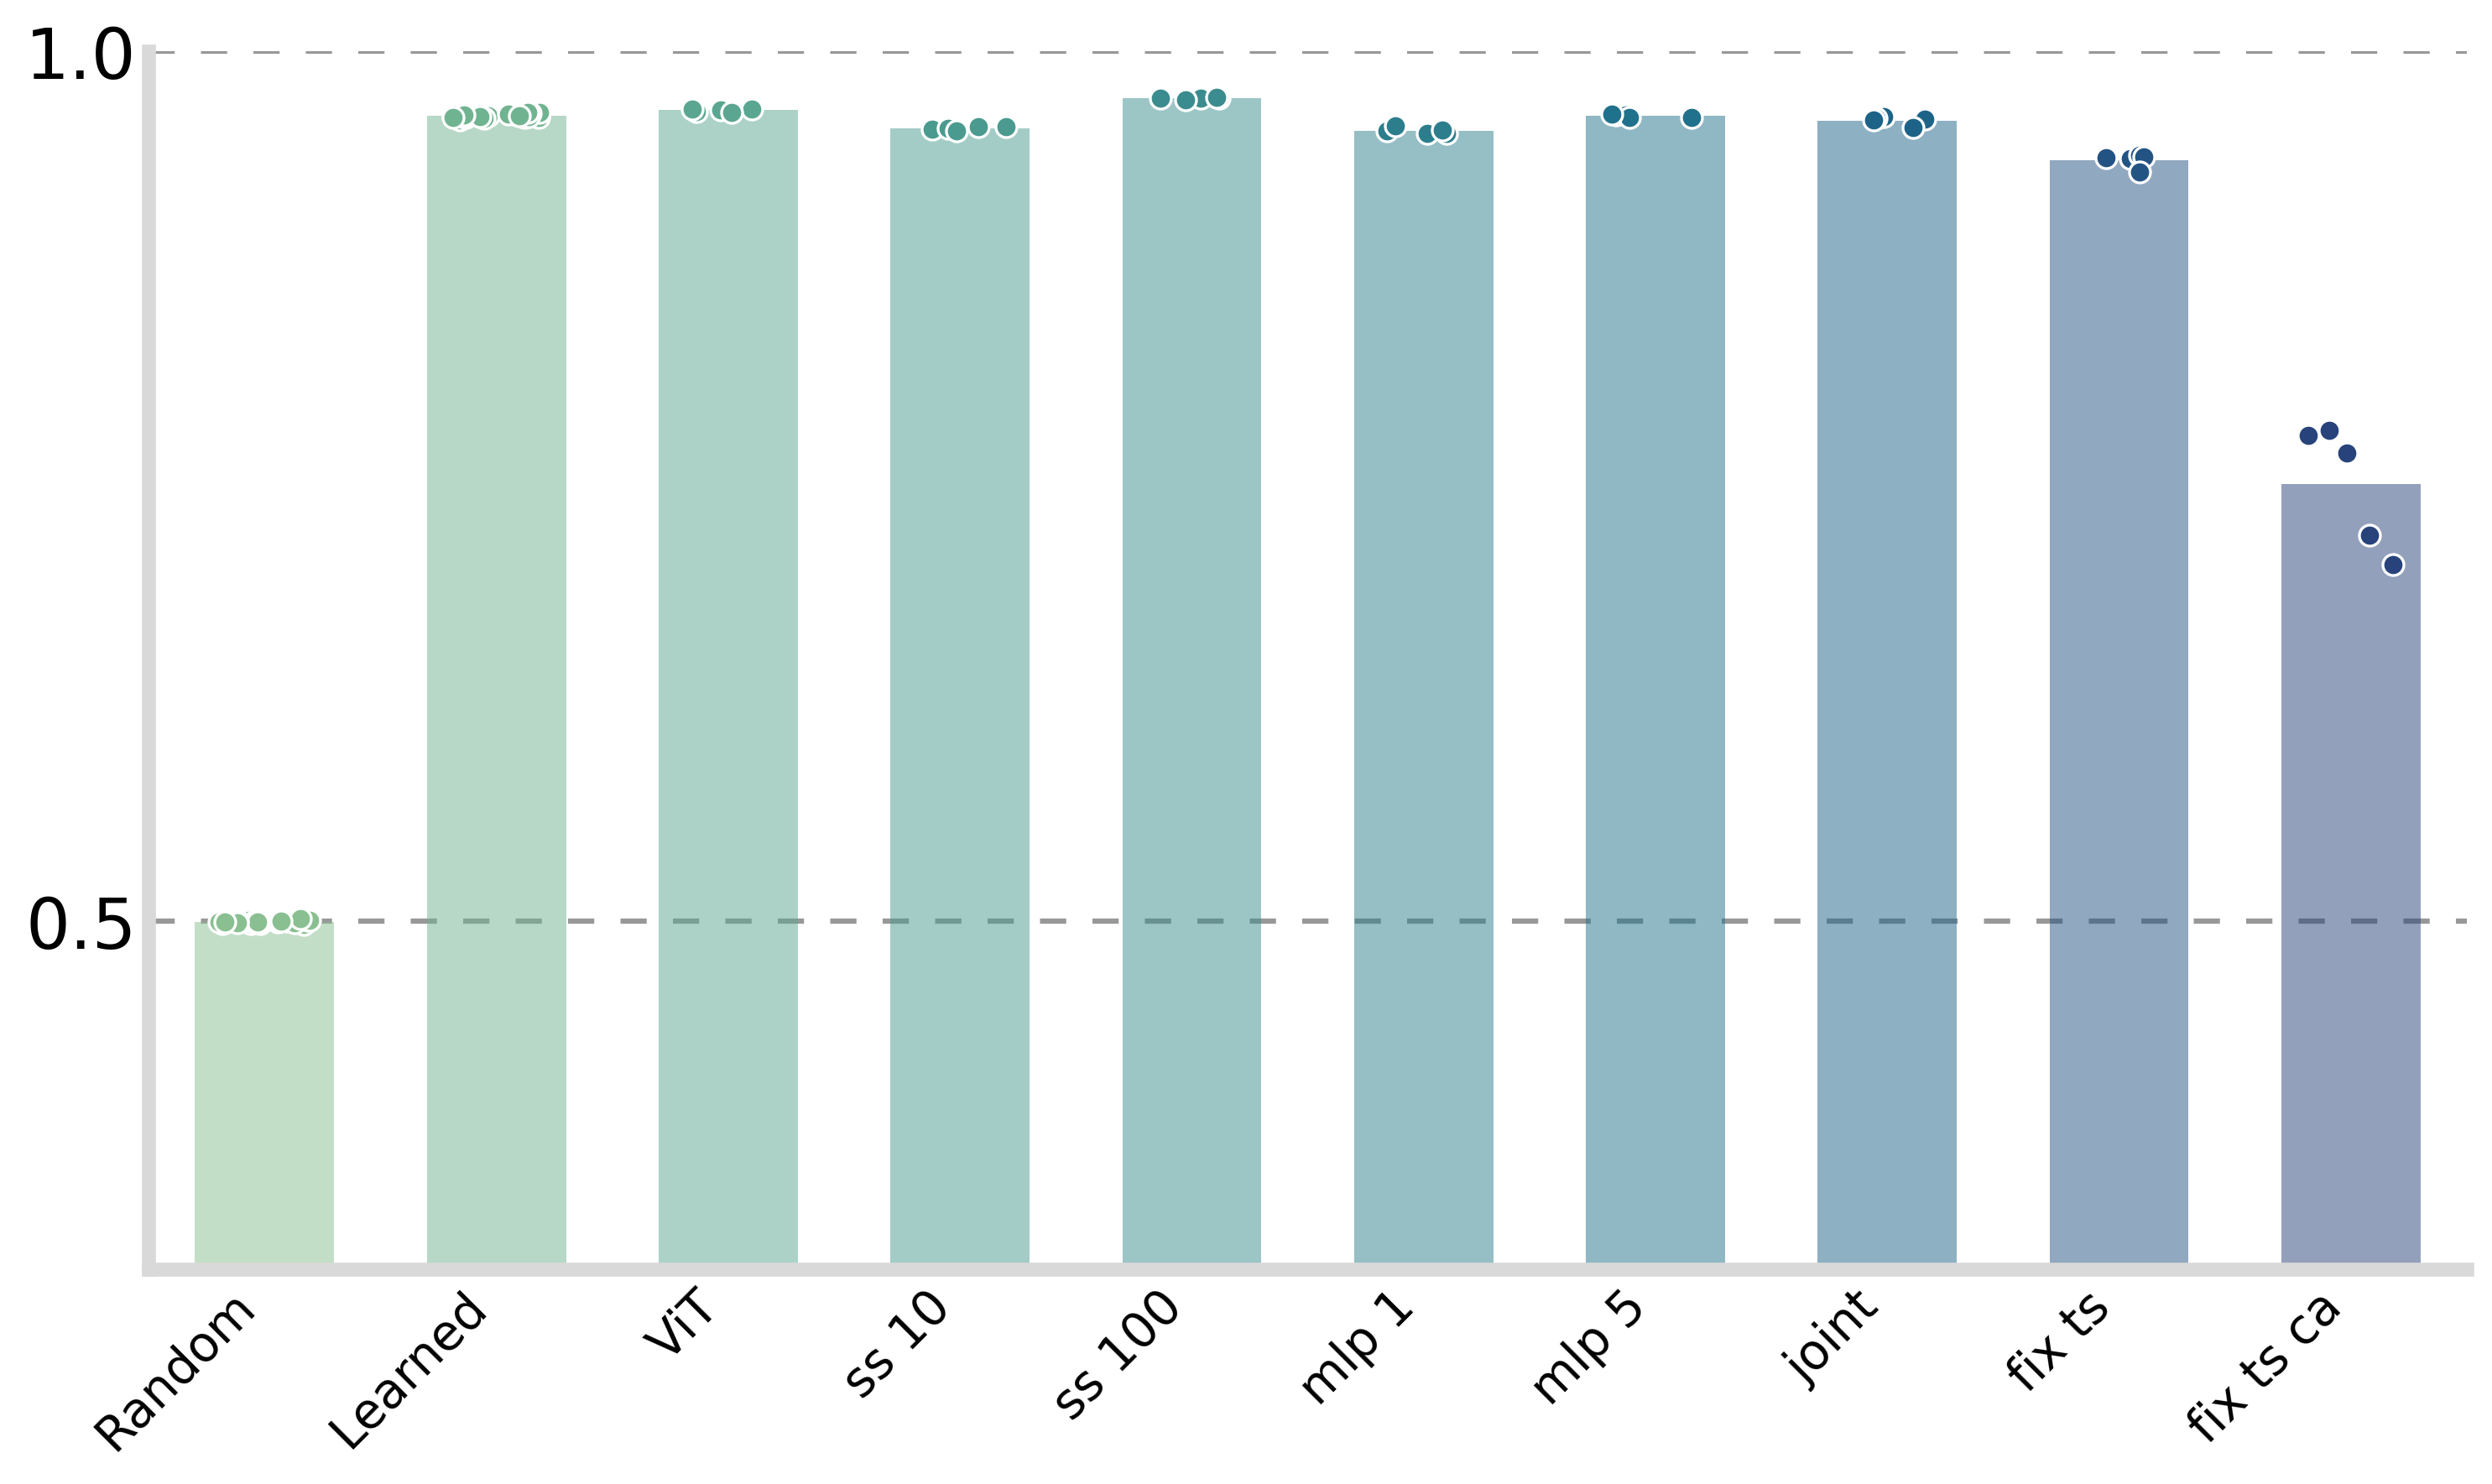

In [24]:
# Sample data
# 30 * 1
group1 = np.array(acc_list_random_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails)
group2 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails)
# 5 * 1
group3 = np.array(acc_list_imagenet1k_ss20_fixfe_vit_b_16_mlp3_hidden100_initrandom_alltrails)
group4 = np.array(acc_list_imagenet1k_ss10_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails)
group5 = np.array(acc_list_imagenet1k_ss100_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails)
group6 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp1_hidden100_initrandom_alltrails)
group7 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp5_hidden100_initrandom_alltrails)
group8 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_jointTrue_initrandom_alltrails)
group9 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixtsTrue_initrandom_alltrails)
group10 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixtscaTrue_initrandom_alltrails)

# Consolidate all data groups into a list
all_groups = [group1, group2, group3, group4, group5, group6, group7, group8, group9, group10]
group_labels = ['Random', 'Learned', 'ViT', 'ss 10', 'ss 100', 'mlp 1', 'mlp 5', 'joint', 'fix ts', 'fix ts ca']

# Define styling constants from your original code
GREY50 = '#7F7F7F'
GREY_LIGHT = '#D9D9D9'
HLINES = [0.5, 1.0]

# Option 1: A very soft and modern blue-green colormap (Highly Recommended)
cmap_name = 'crest'

# Option 2: The classic and safe Matplotlib default
# cmap_name = 'viridis'

# Option 3: A soft and professional blue-yellow colormap
# cmap_name = 'cividis'

# Option 4: A soft teal-to-purple colormap
# cmap_name = 'mako'

# We use np.linspace to pick evenly spaced colors from the gradient
cmap = cm.get_cmap(cmap_name)
colors = cmap(np.linspace(0.1, 0.9, len(all_groups))) # Use 0.1-0.9 to avoid extreme colors

# Calculate means for each group
means = [np.mean(g) for g in all_groups]

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Bar width and jitter setup
bar_width = 0.6
jitter_width = bar_width / 3 # Adjust jitter width to be slightly smaller than the bar

# Loop through each group to plot bars and scatter points
for i, group_data in enumerate(all_groups):
    # Bar plot for the mean of the current group
    ax.bar(i, np.mean(group_data), color=colors[i], alpha=0.5, width=bar_width)

    # Generate jittered x-coordinates for scatter plot
    x_jittered = np.ones(len(group_data)) * i + np.random.uniform(-jitter_width, jitter_width, len(group_data))

    # Scatter plot for individual data points
    ax.scatter(x_jittered, group_data, color=colors[i], edgecolors='white', linewidth=0.8, zorder=3)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Customizing the axes and ticks
ax.set_xticks(range(len(all_groups)))
ax.set_xticklabels(group_labels, fontsize=14, rotation=45, ha='right')

# Adjust plot limits
ax.set_xlim(-0.5, len(all_groups) - 0.5)
ax.set_ylim(0.3, 1.0)

# Removes top and right spines
ax.spines[['right', 'top']].set_visible(False)

# Style left and bottom spines
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(4)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(4)

# Style ticks
ax.tick_params(length=0) # Removes tick marks
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=20)

# Ensure layout is tight to prevent labels from being cut off
plt.tight_layout()

# Save or show the plot
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures",
#         "outputs",
#         "fig_2ac.eps"
#     ), 
#     format="eps", 
#     bbox_inches='tight'
# )
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures",
#         "outputs",
#         "fig_2ac.png"
#     ), 
#     format="png", 
#     bbox_inches='tight'
# )

plt.show()

/tmp/ipykernel_109805/861969443.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


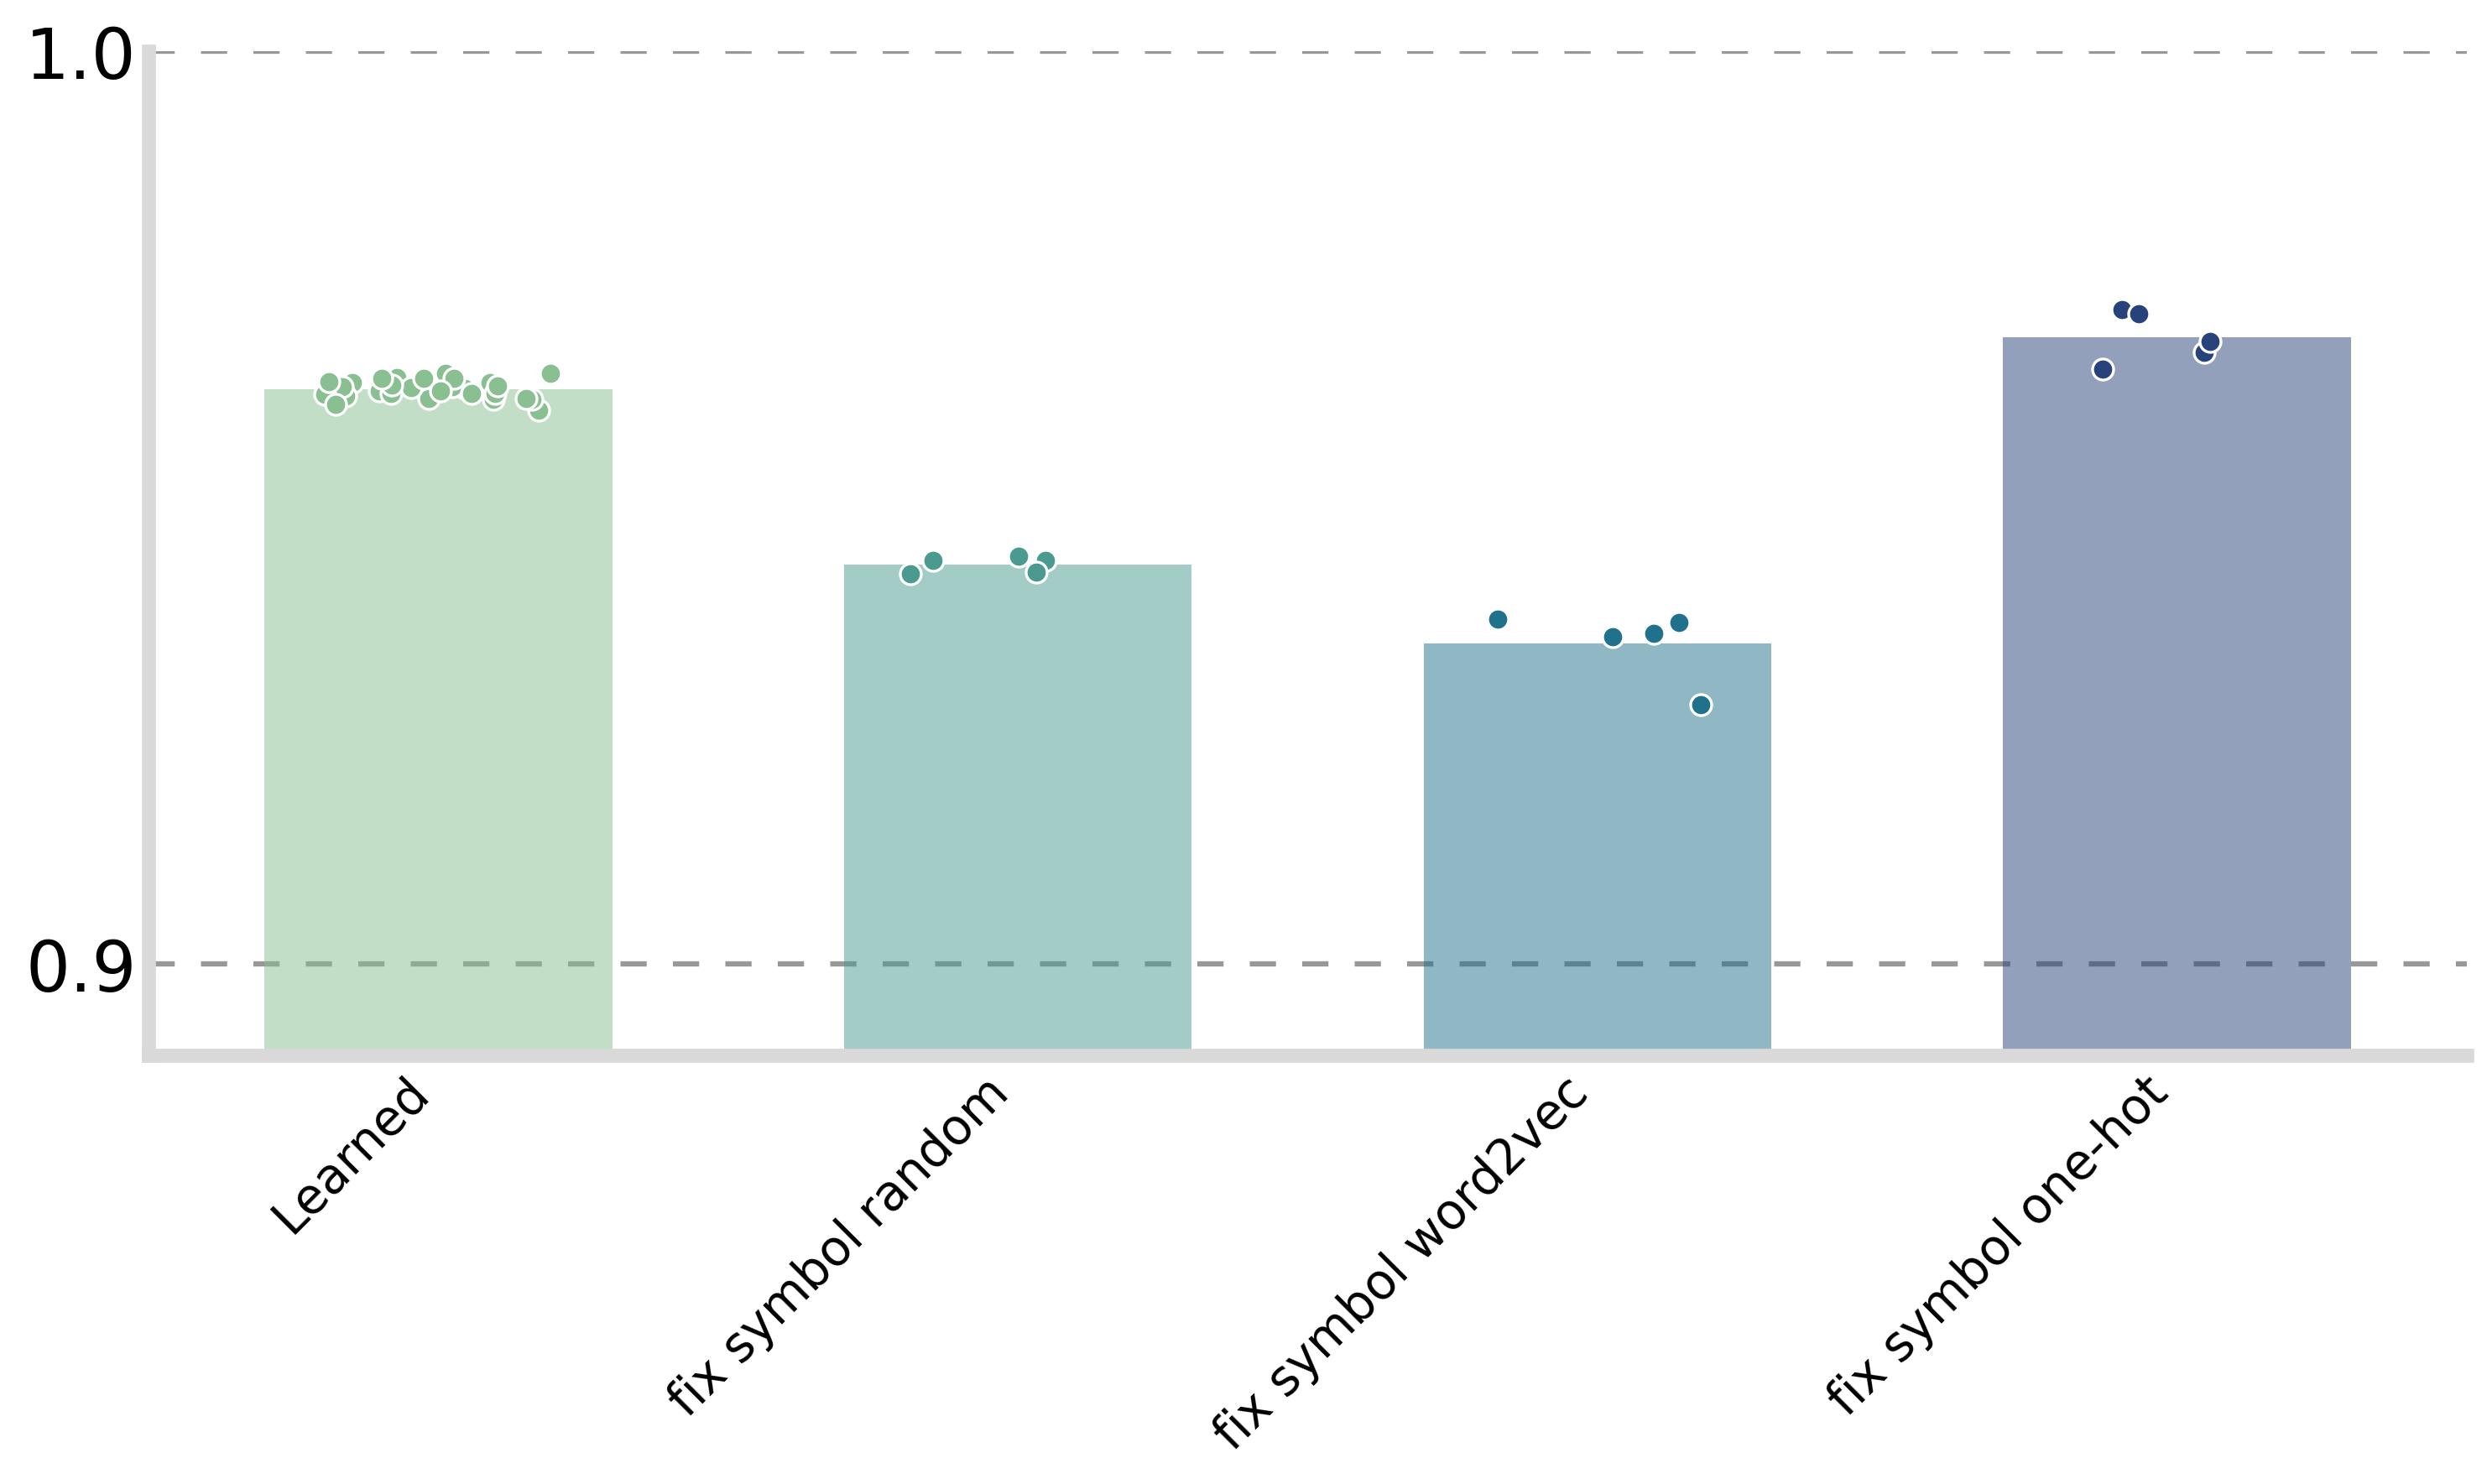

In [27]:
# Sample data
# 30 * 1
group2 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_alltrails)
# 5 * 1
group11 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initrandom_alltrails)
group12 = np.array(acc_list_imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initword2vec_alltrails)
group13 = np.array(acc_list_imagenet1k_ss1000_fixfe_resnet50_mlp3_hidden100_fixsymbolTrue_initone_hot_alltrails)

# Consolidate all data groups into a list
all_groups = [group2, group11, group12, group13]
group_labels = ['Learned', 'fix symbol random', 'fix symbol word2vec', 'fix symbol one-hot']

# Define styling constants from your original code
GREY50 = '#7F7F7F'
GREY_LIGHT = '#D9D9D9'
HLINES = [0.9, 1.0]

# Option 1: A very soft and modern blue-green colormap (Highly Recommended)
cmap_name = 'crest'

# Option 2: The classic and safe Matplotlib default
# cmap_name = 'viridis'

# Option 3: A soft and professional blue-yellow colormap
# cmap_name = 'cividis'

# Option 4: A soft teal-to-purple colormap
# cmap_name = 'mako'

# We use np.linspace to pick evenly spaced colors from the gradient
cmap = cm.get_cmap(cmap_name)
colors = cmap(np.linspace(0.1, 0.9, len(all_groups))) # Use 0.1-0.9 to avoid extreme colors

# Calculate means for each group
means = [np.mean(g) for g in all_groups]

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Bar width and jitter setup
bar_width = 0.6
jitter_width = bar_width / 3 # Adjust jitter width to be slightly smaller than the bar

# Loop through each group to plot bars and scatter points
for i, group_data in enumerate(all_groups):
    # Bar plot for the mean of the current group
    ax.bar(i, np.mean(group_data), color=colors[i], alpha=0.5, width=bar_width)

    # Generate jittered x-coordinates for scatter plot
    x_jittered = np.ones(len(group_data)) * i + np.random.uniform(-jitter_width, jitter_width, len(group_data))

    # Scatter plot for individual data points
    ax.scatter(x_jittered, group_data, color=colors[i], edgecolors='white', linewidth=0.8, zorder=3)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Customizing the axes and ticks
ax.set_xticks(range(len(all_groups)))
ax.set_xticklabels(group_labels, fontsize=14, rotation=45, ha='right')

# Adjust plot limits
ax.set_xlim(-0.5, len(all_groups) - 0.5)
ax.set_ylim(0.89, 1.0)

# Removes top and right spines
ax.spines[['right', 'top']].set_visible(False)

# Style left and bottom spines
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(4)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(4)

# Style ticks
ax.tick_params(length=0) # Removes tick marks
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=20)

# Ensure layout is tight to prevent labels from being cut off
plt.tight_layout()

# Save or show the plot
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures",
#         "outputs",
#         "fig_2ac.eps"
#     ), 
#     format="eps", 
#     bbox_inches='tight'
# )
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures",
#         "outputs",
#         "fig_2ac.png"
#     ), 
#     format="png", 
#     bbox_inches='tight'
# )

plt.show()

# Fig 2 c&d - Waffle plot for entropy

In [ ]:
unique_hypercategory = sorted(list(set(imagenet1k_hypercategory.values())))
print(unique_hypercategory)

## Fig 2c - One-hot as concept, untrained cats-net

In [ ]:
net = model.cats_net(symbol_size = 20, num_classes = 1000, fix_fe = True, fe_type = 'resnet50', pretrain=True)

net.symbol_set.data = torch.rand(net.symbol_set.shape)

X_train = net.symbol_set.detach().numpy()

imagenet1k_test_FeatureDataset = data.FeatureDataset(
    os.path.join(project_root, "Results", "FeatureData", "imageNet1k_val_resnet50_embeddings.pt"), 
    os.path.join(project_root, "Results", "FeatureData", "imageNet1k_val_resnet50_indices.pt")
)
imagenet1k_test_FeatureLoader = DataLoader(
    imagenet1k_test_FeatureDataset, 
    batch_size = 512, 
    num_workers = 8, 
    shuffle = False
)

net.to('cuda')
net.eval()

Imagenet1k_test_stat_Rands = torch.zeros([20, 1000])
Imagenet1k_test_stat_Rands_T = Imagenet1k_test_stat_Rands.T

for i in range(20):
    concept_i = torch.zeros(net.symbol_set[i].shape)
    concept_i[i] = 1.0

    print(f'Processing One-hot on random init cats-net')
    for X, y in imagenet1k_test_FeatureLoader:
        X = X.to('cuda')
        symbol_batch = concept_i.repeat([X.shape[0], 1]).to('cuda')
        y_hat = net.feature_forward(X, symbol_batch)
        y_hat = y_hat.to('cpu')
        mask = y_hat[:, 0] < y_hat[:, 1]
        indices_to_increment = y[mask]
        for j in range(len(y[mask])):
            Imagenet1k_test_stat_Rands[i, y[mask][j]] += 1

from collections import Counter

print(f'Counting number for each repeat: {Imagenet1k_test_stat_Rands.sum(dim=1).tolist()}')

Imagenet1k_test_stat_Rands_forWaffle = torch.zeros([20, len(unique_hypercategory)])

value_counts = Counter(imagenet1k_hypercategory.values())
sorted_value_counts = sorted(value_counts.items())
for value, count in sorted_value_counts:
    print(f"{value}: {count}")

for idx_pc in range(20):
    for i, value in enumerate(imagenet1k_hypercategory.values()):
        for j, hyper in enumerate(unique_hypercategory):
            if hyper == value:
                Imagenet1k_test_stat_Rands_forWaffle[idx_pc, j] += Imagenet1k_test_stat_Rands[idx_pc, i]

print(unique_hypercategory)
torch.save(
    Imagenet1k_test_stat_Rands_forWaffle, 
    os.path.join(
        project_root, 
        "Results", 
        "entropy_stat", 
        "catsnet_init_onehotconcept_waffle.pt"
    )
)


In [ ]:
Imagenet1k_test_stat_Rands_forWaffle = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "entropy_stat", 
        "catsnet_init_onehotconcept_waffle.pt"
    )
)

ncols = 20
fig, axs = plt.subplots(ncols=ncols, figsize=(6, 2), dpi=300)

count_max = Imagenet1k_test_stat_Rands_forWaffle.sum(dim = 1).max().item()
count_max_round = int(round(count_max / 1000) * 1000 / 2)

print(f'Max counting value of symbols: {count_max}')

for idx_pc, ax in enumerate(axs):
    values = Imagenet1k_test_stat_Rands_forWaffle[idx_pc].tolist()
    values.append(int(Imagenet1k_test_stat_Rands_forWaffle.sum(dim = 1).max().item()) - sum(values))
    Waffle.make_waffle(
        ax=ax,
        rows=100, 
        columns=10, 
        values=values,
        vertical=True,
        colors=[waffle_hex[0], waffle_hex[1], waffle_hex[2], waffle_hex[3], waffle_hex[4], 'white'] # imagenet1k_hypercategory_v2
    )
    ax.text(
        x=0.025, y=-0.13, s=str(idx_pc+1), fontsize=10, zorder=3
    )

bottom_line = plt.Line2D([0.127, 0.898], [0.11, 0.11], transform=fig.transFigure, color=GREY_LIGHT, linestyle='-', linewidth=2)
fig.add_artist(bottom_line)

line = plt.Line2D([0.125, 0.9], [0.5, 0.5], transform=fig.transFigure, color=GREY50, linestyle='--', linewidth=1.0, alpha=0.5)
fig.add_artist(line)
fig.text(0.11, 0.5, str(count_max_round), va='center', ha='right', transform=fig.transFigure, fontsize=10)

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_2c.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_2c.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

## Fig 2d - One-hot as concept, trained cats-net, hyper stat

In [ ]:
net_global_id = 50
net = model.cats_net(symbol_size = 20, num_classes = 1000, fix_fe = True, fe_type = 'resnet50')
net.load_state_dict(
    torch.load(
        os.path.join(
            project_root, 
            "Results", 
            "param", 
            f"imagenet1k_ss20_fixfe_resnet50_mlp3_hidden100_initrandom_trail{net_global_id}.pt"
        )
    ), 
    strict=True
)

net.symbol_set.data = torch.rand(net.symbol_set.shape)

X_train = net.symbol_set.detach().numpy()

imagenet1k_test_FeatureDataset = data.FeatureDataset(
    os.path.join(project_root, "Results", "FeatureData", "imageNet1k_val_resnet50_embeddings.pt"), 
    os.path.join(project_root, "Results", "FeatureData", "imageNet1k_val_resnet50_indices.pt")
)
imagenet1k_test_FeatureLoader = DataLoader(
    imagenet1k_test_FeatureDataset, 
    batch_size = 512, 
    num_workers = 8, 
    shuffle = False
)

net.to('cuda')
net.eval()

Imagenet1k_test_stat_Rands = torch.zeros([20, 1000])
Imagenet1k_test_stat_Rands_T = Imagenet1k_test_stat_Rands.T

for i in range(20):
    concept_i = torch.zeros(net.symbol_set[i].shape)
    concept_i[i] = 1.0

    print(f'Processing One-hot {i}')
    for X, y in imagenet1k_test_FeatureLoader:
        X = X.to('cuda')
        symbol_batch = concept_i.repeat([X.shape[0], 1]).to('cuda')
        y_hat = net.feature_forward(X, symbol_batch)
        y_hat = y_hat.to('cpu')
        mask = y_hat[:, 0] < y_hat[:, 1]
        indices_to_increment = y[mask]
        for j in range(len(y[mask])):
            Imagenet1k_test_stat_Rands[i, y[mask][j]] += 1

from collections import Counter

print(f'Counting number for each category: {Imagenet1k_test_stat_Rands.sum(dim=1).tolist()}')

Imagenet1k_test_stat_Rands_forWaffle = torch.zeros([20, len(unique_hypercategory)])

value_counts = Counter(imagenet1k_hypercategory.values())
sorted_value_counts = sorted(value_counts.items())
for value, count in sorted_value_counts:
    print(f"{value}: {count}")

for idx_pc in range(20):
    for i, value in enumerate(imagenet1k_hypercategory.values()):
        for j, hyper in enumerate(unique_hypercategory):
            if hyper == value:
                Imagenet1k_test_stat_Rands_forWaffle[idx_pc, j] += Imagenet1k_test_stat_Rands[idx_pc, i]

print(unique_hypercategory)
torch.save(
    Imagenet1k_test_stat_Rands_forWaffle, 
    os.path.join(
        project_root,
        "Results",
        "entropy_stat",
        f"catsnet{net_global_id}_onehotconcept_waffle.pt"
    )
)


In [ ]:
net_global_id = 50
Imagenet1k_test_stat_Rands_forWaffle = torch.load(
    os.path.join(
        project_root,
        "Results",
        "entropy_stat",
        f"catsnet{net_global_id}_onehotconcept_waffle.pt"
    )
)

ncols = 20
fig, axs = plt.subplots(ncols=ncols, figsize=(6, 2), dpi=300)

count_max = Imagenet1k_test_stat_Rands_forWaffle.sum(dim = 1).max().item()
count_max_round = int(round(count_max / 1000) * 1000 / 2)

print(f'Max counting value of symbols: {count_max}')

for idx_pc, ax in enumerate(axs):
    values = Imagenet1k_test_stat_Rands_forWaffle[idx_pc].tolist()
    values.append(int(Imagenet1k_test_stat_Rands_forWaffle.sum(dim = 1).max().item()) - sum(values))
    Waffle.make_waffle(
        ax=ax,
        rows=100, 
        columns=10, 
        values=values,
        vertical=True,
        colors=[waffle_hex[0], waffle_hex[1], waffle_hex[2], waffle_hex[3], waffle_hex[4], 'white'] # imagenet1k_hypercategory_v2
    )
    ax.text(
        x=0.025, y=-0.13, s=str(idx_pc+1), fontsize=10, zorder=3
    )

bottom_line = plt.Line2D([0.127, 0.898], [0.11, 0.11], transform=fig.transFigure, color=GREY_LIGHT, linestyle='-', linewidth=2)
fig.add_artist(bottom_line)

line = plt.Line2D([0.125, 0.9], [0.5, 0.5], transform=fig.transFigure, color=GREY50, linestyle='--', linewidth=1.0, alpha=0.5)
fig.add_artist(line)
fig.text(0.11, 0.5, str(count_max_round), va='center', ha='right', transform=fig.transFigure, fontsize=10)

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_2d.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_2d.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

# Fig 2f - Entropy dist Rand concept vs Rand TS
Run A02 / B05_functional_entropy.ipynb first.

In [ ]:
def get_non_zero_values(input_tensor):
    return input_tensor[input_tensor != 0.0]

def get_entropy(normalized_prob, eps = None):
    if eps == None:
        non_zero_normalized_prob = get_non_zero_values(normalized_prob)
    else:
        non_zero_normalized_prob = torch.clamp(normalized_prob, min = eps)
    return -torch.sum(non_zero_normalized_prob * torch.log2(non_zero_normalized_prob))

In [ ]:
net_global_id = 50
Imagenet1k_test_stat_trainedConfig = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "entropy_stat", 
        f"Imagenet1k_test_stat_catsnet{net_global_id}_trainedConfig.pt"
    )
)
prob_trainedConfig = Imagenet1k_test_stat_trainedConfig * 0.02
sumprob_trainedConfig = prob_trainedConfig.sum(dim = 1, keepdim = True)
mask_trainedConfig = sumprob_trainedConfig.squeeze() != 0.0
normalized_trainedConfig = prob_trainedConfig / sumprob_trainedConfig
normalized_trainedConfig = normalized_trainedConfig[mask_trainedConfig]
entropy_trainedConfig = torch.zeros(normalized_trainedConfig.shape[0])
for i in range(normalized_trainedConfig.shape[0]): # prob_randomConfig.shape[0]
    selected_normalized_trainedConfig = normalized_trainedConfig[i]
    entropy_trainedConfig[i] = get_entropy(selected_normalized_trainedConfig)

Imagenet1k_test_stat_randomConfig = torch.load(
    os.path.join(
        project_root, 
        "Results", 
        "entropy_stat", 
        "Imagenet1k_test_stat_tsnet_randomConfig.pt"
    )
)
prob_randomConfig = Imagenet1k_test_stat_randomConfig * 0.02
sumprob_randomConfig = prob_randomConfig.sum(dim = 1, keepdim = True)
mask_randomConfig = sumprob_randomConfig.squeeze() != 0.0
normalized_randomConfig = prob_randomConfig / sumprob_randomConfig
normalized_randomConfig = normalized_randomConfig[mask_randomConfig]
entropy_randomConfig = torch.zeros(normalized_randomConfig.shape[0])

for i in range(normalized_randomConfig.shape[0]):
    selected_normalized_randomConfig = normalized_randomConfig[i]
    entropy_randomConfig[i] = get_entropy(selected_normalized_randomConfig)

fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
list1 = entropy_trainedConfig.tolist()
list2 = entropy_randomConfig.tolist()
bandwidth = 1.0
kde = sns.kdeplot(
    list1,
    fill = True,
    bw_adjust = bandwidth,
    ax = ax,
    color = blue_hex[5],
)

kde = sns.kdeplot(
    list2,
    fill = True,
    bw_adjust = bandwidth,
    ax = ax,
    color = purple_hex[3],
)

ax.tick_params(axis='x', labelcolor=(0, 0, 0, 1), length = 0)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlim(0, 12)
ax.tick_params(axis='y', labelcolor=(0, 0, 0, 1), length = 0)
# ax.set_yticks([0, 35, 70])
# ax.set_yticks(specific_ticks)

ax.axvline(9.96, color = GREY50, linestyle='--', linewidth = 1.0)
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)
ax.spines[['right', 'top']].set_visible(False)

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_2f.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_2f.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

# Fig 3e & Fig 4b Mean acc comm. and word2vec

## Fig 3e vertical comm.

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [cifar100_comm_acc]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.06
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.5: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.5,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.4)

max_y = max(y_data[0])
offset = 0.02
ax.text(POSITIONS[0], max_y + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Accuracy", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["Communication (n=100)"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_3e.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_3e.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

In [ ]:
# Extract the two lists
sample1 = y_data[0]

# --- Test 1: Check if the mean of each sample is significantly greater than zero ---
# We use a one-sample t-test.
# H0: The mean of the sample is equal to 0.
# H1: The mean of the sample is greater than 0.

print("--- One-sample t-tests (mean > 0) ---")
alpha = 0.05 # Significance level

threshold = 0.7
# For sample 1
# The 'alternative' parameter is set to 'greater' for a one-sided test.
t_statistic_s1, p_value_s1 = stats.ttest_1samp(sample1, threshold, alternative='greater')
print(f"Sample 1: t-statistic = {t_statistic_s1:.4f}, p-value = {p_value_s1:.4f}")
print(f'mean {np.mean(sample1):.4f}, std {np.std(sample1):.4f}')
if p_value_s1 < alpha:
    print(f"  The mean of Sample 1 is significantly greater than {threshold:.4f}")
else:
    print(f"  There is not enough evidence to say the mean of Sample 1 is significantly greater than {threshold:.4f}")

print("-" * 40)


## Fig 4b vertical word2vec

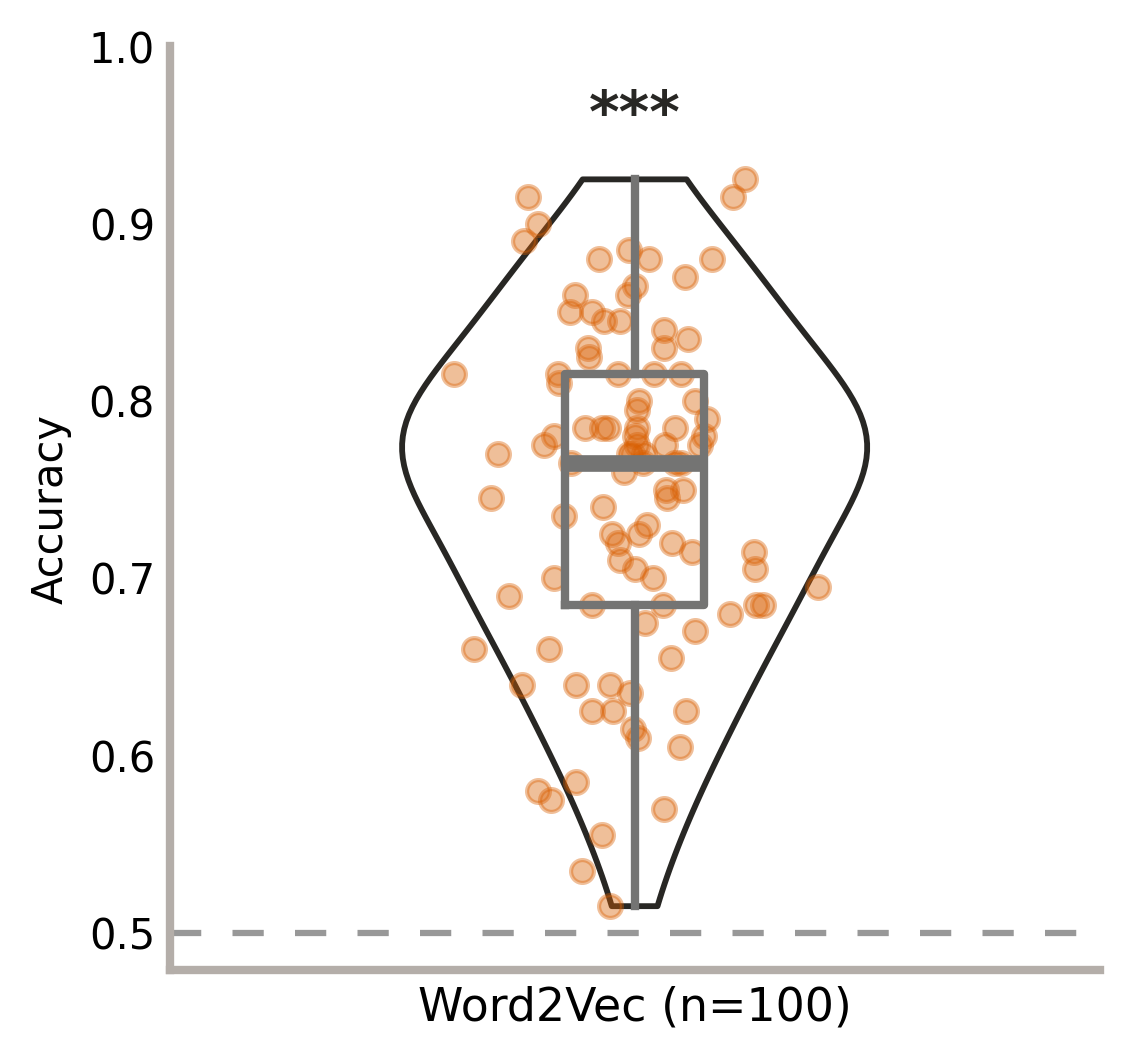

In [15]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [cifar100_wordvec_acc]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.06
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#D95F02", "#7570B3"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.5: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.5,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.4)

max_y = max(y_data[0])
offset = 0.02
ax.text(POSITIONS[0], max_y + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Accuracy", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["Word2Vec (n=100)"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_4b.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_4b.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

In [ ]:
# Extract the two lists
sample1 = y_data[0]

# --- Test 1: Check if the mean of each sample is significantly greater than zero ---
# We use a one-sample t-test.
# H0: The mean of the sample is equal to 0.
# H1: The mean of the sample is greater than 0.

print("--- One-sample t-tests (mean > 0) ---")
alpha = 0.05 # Significance level

threshold = 0.7
# For sample 1
# The 'alternative' parameter is set to 'greater' for a one-sided test.
t_statistic_s1, p_value_s1 = stats.ttest_1samp(sample1, threshold, alternative='greater')
print(f"Sample 1: t-statistic = {t_statistic_s1:.4f}, p-value = {p_value_s1:.4f}")
print(f'mean {np.mean(sample1):.4f}, std {np.std(sample1):.4f}')
if p_value_s1 < alpha:
    print(f"  The mean of Sample 1 is significantly greater than {threshold:.4f}")
else:
    print(f"  There is not enough evidence to say the mean of Sample 1 is significantly greater than {threshold:.4f}")

print("-" * 40)


## Fig 4c THINGS 49 dim

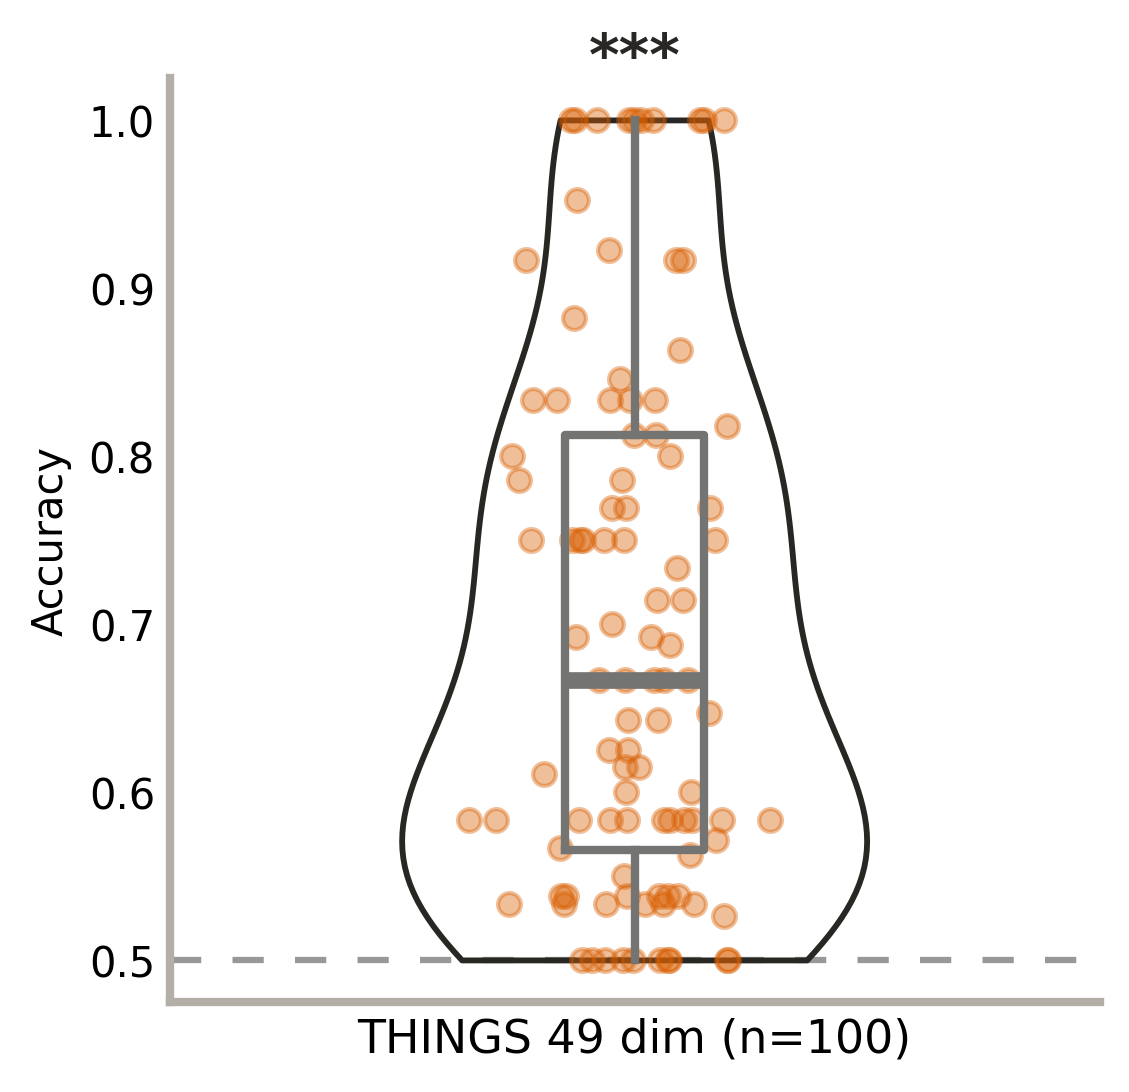

In [20]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [[y  * 0.01 for y in things_49dim_acc]]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.06
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#D95F02", "#7570B3"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.5: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.5,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.4)

max_y = max(y_data[0])
offset = 0.02
ax.text(POSITIONS[0], max_y + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Accuracy", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["THINGS 49 dim (n=100)"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_4b.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_4b.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

In [21]:
# Extract the two lists
sample1 = y_data[0]

# --- Test 1: Check if the mean of each sample is significantly greater than zero ---
# We use a one-sample t-test.
# H0: The mean of the sample is equal to 0.
# H1: The mean of the sample is greater than 0.

print("--- One-sample t-tests (mean > 0) ---")
alpha = 0.05 # Significance level

threshold = 0.5
# For sample 1
# The 'alternative' parameter is set to 'greater' for a one-sided test.
t_statistic_s1, p_value_s1 = stats.ttest_1samp(sample1, threshold, alternative='greater')
print(f"Sample 1: t-statistic = {t_statistic_s1:.4f}, p-value = {p_value_s1:.4f}")
print(f'mean {np.mean(sample1):.4f}, std {np.std(sample1):.4f}')
if p_value_s1 < alpha:
    print(f"  The mean of Sample 1 is significantly greater than {threshold:.4f}")
else:
    print(f"  There is not enough evidence to say the mean of Sample 1 is significantly greater than {threshold:.4f}")

print("-" * 40)


--- One-sample t-tests (mean > 0) ---
Sample 1: t-statistic = 12.4336, p-value = 0.0000
mean 0.6967, std 0.1574
  The mean of Sample 1 is significantly greater than 0.5000
----------------------------------------


# Fig 5c_left Concept pcorr VOTC

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [concept_pcorr_votc]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.07
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#D5817F"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.0: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.3,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.6)

max_y = max(y_data[0])
offset = 0.005
ax.text(POSITIONS[0], max_y + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Fisher-z transformed\nmean Spearman’s "r"$\rho$", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["VOTC"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")
plt.title("Concept layer", size=12, weight="bold")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_5c_left.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_5c_left.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

In [ ]:
# Extract the two lists
sample1 = y_data[0]

# --- Test 1: Check if the mean of each sample is significantly greater than zero ---
# We use a one-sample t-test.
# H0: The mean of the sample is equal to 0.
# H1: The mean of the sample is greater than 0.

print("--- One-sample t-tests (mean > 0) ---")
alpha = 0.05 # Significance level

# For sample 1
# The 'alternative' parameter is set to 'greater' for a one-sided test.
t_statistic_s1, p_value_s1 = stats.ttest_1samp(sample1, 0, alternative='greater')
print(f"Sample 1: t-statistic = {t_statistic_s1:.4f}, p-value = {p_value_s1:.4f}")
print(f'mean {np.mean(sample1):.2f}, std {np.std(sample1):.2f}')
if p_value_s1 < alpha:
    print("  The mean of Sample 1 is significantly greater than 0.")
else:
    print("  There is not enough evidence to say the mean of Sample 1 is significantly greater than 0.")

print("-" * 40)


# Fig 5c_right CA1 pcorr semantic vs. general

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [ca1_semantic_corr, ca1_general_corr]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.1
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#92C3DD", "#5DA872"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [-0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.0: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.6,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.6)

max_y0 = max(y_data[0])
max_y1 = max(y_data[1])
offset = 0.001
ax.text(POSITIONS[0], max_y0 + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)
ax.text(POSITIONS[1], max_y1 + offset, "**", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Add significance line ----------------------------------------------
# Calculate the height for the significance bar
y_max = max(max(y_data[0]), max(y_data[1]))
bar_height = y_max + 0.01 # Adjust offset as needed
tick_height = 0.002       # Height of the small vertical ticks

# Plot the horizontal bar
ax.plot([POSITIONS[0], POSITIONS[0], POSITIONS[1], POSITIONS[1]], 
        [bar_height - tick_height, bar_height, bar_height, bar_height - tick_height], 
        lw=1.5, c=BLACK)

# Add the significance star
ax.text((POSITIONS[0] + POSITIONS[1]) / 2, bar_height + 0.001, "**", ha='center', va='bottom', color=BLACK, fontsize=14, weight="bold")

# You might need to adjust the y-axis limits if the bar goes out of bounds
current_ylim = ax.get_ylim()
ax.set_ylim(current_ylim[0], max(current_ylim[1], bar_height + 0.005)) # Adjust upper limit if needed


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Fisher-z transformed\nmean Spearman’s "r"$\rho$", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["Semantic Control", "Multiple Demand"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")
plt.title("CA1 layer", size=12, weight="bold")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_5c_right.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_5c_right.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

# -----------------------------------------------
# Extract the two lists
sample1 = y_data[0]
sample2 = y_data[1]

# --- Helper function to get significance stars ---
def get_significance_stars(p_value):
    """
    Returns significance stars based on p-value.
    ***: p < 0.001
    **:  p < 0.01
    *:   p < 0.05
    """
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return "" # No stars if not significant at p < 0.05

# --- Print significance legend ---
print("Significance levels legend:")
print("  *** : p < 0.001")
print("  ** : p < 0.01")
print("  * : p < 0.05")
print("  (ns): not significant (p >= 0.05)")
print("-" * 50)


# --- Test 1: Check if the mean of each sample is significantly greater than zero ---
# We use a one-sample t-test.
# H0: The mean of the sample is equal to 0.
# H1: The mean of the sample is greater than 0.

print("--- One-sample t-tests (mean > 0) ---")
# Primary significance level for conclusion text
alpha = 0.05

# For sample 1
# The 'alternative' parameter is set to 'greater' for a one-sided test.
t_statistic_s1, p_value_s1 = stats.ttest_1samp(sample1, 0, alternative='greater')
stars_s1 = get_significance_stars(p_value_s1)

print(f"Sample 1: t-statistic = {t_statistic_s1:.4f}, p-value = {p_value_s1:.4f}{stars_s1}")
print(f'mean {np.mean(sample1):.2f}, std {np.std(sample1):.2f}')
if p_value_s1 < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: The mean of Sample 1 is significantly greater than 0 ({stars_s1 if stars_s1 else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say the mean of Sample 1 is significantly greater than 0 (p = {p_value_s1:.4f}, ns).")

print("-" * 40)

# For sample 2
t_statistic_s2, p_value_s2 = stats.ttest_1samp(sample2, 0, alternative='greater')
stars_s2 = get_significance_stars(p_value_s2)

print(f"Sample 2: t-statistic = {t_statistic_s2:.4f}, p-value = {p_value_s2:.4f}{stars_s2}")
print(f'mean {np.mean(sample2):.2f}, std {np.std(sample2):.2f}')
if p_value_s2 < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: The mean of Sample 2 is significantly greater than 0 ({stars_s2 if stars_s2 else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say the mean of Sample 2 is significantly greater than 0 (p = {p_value_s2:.4f}, ns).")

print("\n" + "--- Paired t-test (difference between samples) ---")
# --- Test 2: Check if there is a significant difference between the two paired samples ---
# We use a related-samples t-test (paired t-test).
# H0: The true mean difference between paired samples is zero.
# H1: The true mean difference between paired samples is not zero (two-sided test).

t_statistic_paired, p_value_paired = stats.ttest_rel(sample1, sample2, alternative='two-sided') # Default is 'two-sided'
stars_paired = get_significance_stars(p_value_paired)

print(f"Paired test between Sample 1 and Sample 2 (two-sided):")
print(f"  T-statistic = {t_statistic_paired:.4f}, p-value = {p_value_paired:.4f}{stars_paired}")
if p_value_paired < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: There is a significant difference between the means of Sample 1 and Sample 2 ({stars_paired if stars_paired else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say there is a significant difference between the means of Sample 1 and Sample 2 (p = {p_value_paired:.4f}, ns).")

# Fig 6b Concept group pcorr VOTC

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [concept_pcorr_interest, concept_pcorr_uninterest]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.07
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#D5817F", purple_hex[5]]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.0: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.6,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.6)

max_y0 = max(y_data[0])
max_y1 = max(y_data[1])

# Add significance line ----------------------------------------------
# Calculate the height for the significance bar
y_max = max(max(y_data[0]), max(y_data[1]))
bar_height = y_max + 0.005 # Adjust offset as needed
tick_height = 0.002       # Height of the small vertical ticks

# Plot the horizontal bar
ax.plot([POSITIONS[0], POSITIONS[0], POSITIONS[1], POSITIONS[1]], 
        [bar_height - tick_height, bar_height, bar_height, bar_height - tick_height], 
        lw=1.5, c=BLACK)

# Add the significance star
ax.text((POSITIONS[0] + POSITIONS[1]) / 2, bar_height + 0.001, "**", ha='center', va='bottom', color=BLACK, fontsize=14, weight="bold")

# You might need to adjust the y-axis limits if the bar goes out of bounds
current_ylim = ax.get_ylim()
ax.set_ylim(current_ylim[0], max(current_ylim[1], bar_height + 0.005)) # Adjust upper limit if needed


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Fisher-z transformed\nmean Spearman’s "r"$\rho$", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["high-consensus", "low-consensus"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")
ax.set_xlabel("Model Groups", size=11)
plt.title("Concept layer", size=12, weight="bold")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_6b.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_6b.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

# Fig S1a Concept pcorr binder rho

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [concept_binder_rho]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.07
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#D5817F"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
# HLINES = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
HLINES = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.0: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.3,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.6)

max_y = max(y_data[0])
offset = 0.005
ax.text(POSITIONS[0], max_y + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Fisher-z transformed\n Spearman’s "r"$\rho$", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["Binder65"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")
plt.title("Concept layer", size=12, weight="bold")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s1a.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s1a.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

# Fig S1b Concept pcorr binder rho group

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [concept_rho_interest, concept_rho_uninterest]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.07
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#D5817F", purple_hex[5]]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.0: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.6,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.6)

max_y0 = max(y_data[0])
max_y1 = max(y_data[1])

# Add significance line ----------------------------------------------
# Calculate the height for the significance bar
y_max = max(max(y_data[0]), max(y_data[1]))
bar_height = y_max + 0.025 # Adjust offset as needed
tick_height = 0.01       # Height of the small vertical ticks

# Plot the horizontal bar
ax.plot([POSITIONS[0], POSITIONS[0], POSITIONS[1], POSITIONS[1]], 
        [bar_height - tick_height, bar_height, bar_height, bar_height - tick_height], 
        lw=1.5, c=BLACK)

# Add the significance star
ax.text((POSITIONS[0] + POSITIONS[1]) / 2, bar_height + 0.001, "***", ha='center', va='bottom', color=BLACK, fontsize=14, weight="bold")

# You might need to adjust the y-axis limits if the bar goes out of bounds
current_ylim = ax.get_ylim()
ax.set_ylim(current_ylim[0], max(current_ylim[1], bar_height + 0.005)) # Adjust upper limit if needed


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Fisher-z transformed\n Spearman’s "r"$\rho$", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["high-consensus", "low-consensus"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")
ax.set_xlabel("Model Groups", size=11)
plt.title("Concept layer", size=12, weight="bold")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s1b.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s1b.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

# Fig S2a CA2 pcorr semantic vs. general

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [ca2_semantic_corr, ca2_general_corr]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.1
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#92C3DD", "#5DA872"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [-0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.0: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.6,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.6)

max_y0 = max(y_data[0])
max_y1 = max(y_data[1])
offset = 0.001
ax.text(POSITIONS[0], max_y0 + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)
ax.text(POSITIONS[1], max_y1 + offset, "**", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Add significance line ----------------------------------------------
# Calculate the height for the significance bar
y_max = max(max(y_data[0]), max(y_data[1]))
bar_height = y_max + 0.01 # Adjust offset as needed
tick_height = 0.002       # Height of the small vertical ticks

# Plot the horizontal bar
ax.plot([POSITIONS[0], POSITIONS[0], POSITIONS[1], POSITIONS[1]], 
        [bar_height - tick_height, bar_height, bar_height, bar_height - tick_height], 
        lw=1.5, c=BLACK)

# Add the significance star
ax.text((POSITIONS[0] + POSITIONS[1]) / 2, bar_height, "*", ha='center', va='bottom', color=BLACK, fontsize=14, weight="bold")

# You might need to adjust the y-axis limits if the bar goes out of bounds
current_ylim = ax.get_ylim()
ax.set_ylim(current_ylim[0], max(current_ylim[1], bar_height + 0.005)) # Adjust upper limit if needed


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Fisher-z transformed\nmean Spearman’s "r"$\rho$", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["Semantic Control", "Multiple Demand"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")
plt.title("CA2 layer", size=12, weight="bold")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s2a.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s2a.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

# -----------------------------------------------
# Extract the two lists
sample1 = y_data[0]
sample2 = y_data[1]

# --- Helper function to get significance stars ---
def get_significance_stars(p_value):
    """
    Returns significance stars based on p-value.
    ***: p < 0.001
    **:  p < 0.01
    *:   p < 0.05
    """
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return "" # No stars if not significant at p < 0.05

# --- Print significance legend ---
print("Significance levels legend:")
print("  *** : p < 0.001")
print("  ** : p < 0.01")
print("  * : p < 0.05")
print("  (ns): not significant (p >= 0.05)")
print("-" * 50)


# --- Test 1: Check if the mean of each sample is significantly greater than zero ---
# We use a one-sample t-test.
# H0: The mean of the sample is equal to 0.
# H1: The mean of the sample is greater than 0.

print("--- One-sample t-tests (mean > 0) ---")
# Primary significance level for conclusion text
alpha = 0.05

# For sample 1
# The 'alternative' parameter is set to 'greater' for a one-sided test.
t_statistic_s1, p_value_s1 = stats.ttest_1samp(sample1, 0, alternative='greater')
stars_s1 = get_significance_stars(p_value_s1)

print(f"Sample 1: t-statistic = {t_statistic_s1:.4f}, p-value = {p_value_s1:.4f}{stars_s1}")
print(f'mean {np.mean(sample1):.2f}, std {np.std(sample1):.2f}')
if p_value_s1 < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: The mean of Sample 1 is significantly greater than 0 ({stars_s1 if stars_s1 else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say the mean of Sample 1 is significantly greater than 0 (p = {p_value_s1:.4f}, ns).")

print("-" * 40)

# For sample 2
t_statistic_s2, p_value_s2 = stats.ttest_1samp(sample2, 0, alternative='greater')
stars_s2 = get_significance_stars(p_value_s2)

print(f"Sample 2: t-statistic = {t_statistic_s2:.4f}, p-value = {p_value_s2:.4f}{stars_s2}")
print(f'mean {np.mean(sample2):.2f}, std {np.std(sample2):.2f}')
if p_value_s2 < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: The mean of Sample 2 is significantly greater than 0 ({stars_s2 if stars_s2 else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say the mean of Sample 2 is significantly greater than 0 (p = {p_value_s2:.4f}, ns).")

print("\n" + "--- Paired t-test (difference between samples) ---")
# --- Test 2: Check if there is a significant difference between the two paired samples ---
# We use a related-samples t-test (paired t-test).
# H0: The true mean difference between paired samples is zero.
# H1: The true mean difference between paired samples is not zero (two-sided test).

t_statistic_paired, p_value_paired = stats.ttest_rel(sample1, sample2, alternative='two-sided') # Default is 'two-sided'
stars_paired = get_significance_stars(p_value_paired)

print(f"Paired test between Sample 1 and Sample 2 (two-sided):")
print(f"  T-statistic = {t_statistic_paired:.4f}, p-value = {p_value_paired:.4f}{stars_paired}")
if p_value_paired < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: There is a significant difference between the means of Sample 1 and Sample 2 ({stars_paired if stars_paired else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say there is a significant difference between the means of Sample 1 and Sample 2 (p = {p_value_paired:.4f}, ns).")

# Fig S2b CA3 pcorr semantic vs. generate

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [ca3_semantic_corr, ca3_general_corr]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.1
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#92C3DD", "#5DA872"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
HLINES = [-0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

fig, ax = plt.subplots(figsize= (4, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.0: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.6,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.6)

max_y0 = max(y_data[0])
max_y1 = max(y_data[1])
offset = 0.001
ax.text(POSITIONS[0], max_y0 + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)
ax.text(POSITIONS[1], max_y1 + offset, "**", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Add significance line ----------------------------------------------
# Calculate the height for the significance bar
y_max = max(max(y_data[0]), max(y_data[1]))
bar_height = y_max + 0.01 # Adjust offset as needed
tick_height = 0.002       # Height of the small vertical ticks

# Plot the horizontal bar
ax.plot([POSITIONS[0], POSITIONS[0], POSITIONS[1], POSITIONS[1]], 
        [bar_height - tick_height, bar_height, bar_height, bar_height - tick_height], 
        lw=1.5, c=BLACK)

# Add the significance star
ax.text((POSITIONS[0] + POSITIONS[1]) / 2, bar_height + 0.001, "NS", ha='center', va='bottom', color=BLACK, fontsize=10)

# You might need to adjust the y-axis limits if the bar goes out of bounds
current_ylim = ax.get_ylim()
ax.set_ylim(current_ylim[0], max(current_ylim[1], bar_height + 0.005)) # Adjust upper limit if needed


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Fisher-z transformed\nmean Spearman’s "r"$\rho$", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["Semantic Control", "Multiple Demand"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")
plt.title("CA3 layer", size=12, weight="bold")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s2b.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s2b.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()

# -----------------------------------------------
# Extract the two lists
sample1 = y_data[0]
sample2 = y_data[1]

# --- Helper function to get significance stars ---
def get_significance_stars(p_value):
    """
    Returns significance stars based on p-value.
    ***: p < 0.001
    **:  p < 0.01
    *:   p < 0.05
    """
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return "" # No stars if not significant at p < 0.05

# --- Print significance legend ---
print("Significance levels legend:")
print("  *** : p < 0.001")
print("  ** : p < 0.01")
print("  * : p < 0.05")
print("  (ns): not significant (p >= 0.05)")
print("-" * 50)


# --- Test 1: Check if the mean of each sample is significantly greater than zero ---
# We use a one-sample t-test.
# H0: The mean of the sample is equal to 0.
# H1: The mean of the sample is greater than 0.

print("--- One-sample t-tests (mean > 0) ---")
# Primary significance level for conclusion text
alpha = 0.05

# For sample 1
# The 'alternative' parameter is set to 'greater' for a one-sided test.
t_statistic_s1, p_value_s1 = stats.ttest_1samp(sample1, 0, alternative='greater')
stars_s1 = get_significance_stars(p_value_s1)

print(f"Sample 1: t-statistic = {t_statistic_s1:.4f}, p-value = {p_value_s1:.4f}{stars_s1}")
print(f'mean {np.mean(sample1):.2f}, std {np.std(sample1):.2f}')
if p_value_s1 < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: The mean of Sample 1 is significantly greater than 0 ({stars_s1 if stars_s1 else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say the mean of Sample 1 is significantly greater than 0 (p = {p_value_s1:.4f}, ns).")

print("-" * 40)

# For sample 2
t_statistic_s2, p_value_s2 = stats.ttest_1samp(sample2, 0, alternative='greater')
stars_s2 = get_significance_stars(p_value_s2)

print(f"Sample 2: t-statistic = {t_statistic_s2:.4f}, p-value = {p_value_s2:.4f}{stars_s2}")
print(f'mean {np.mean(sample2):.2f}, std {np.std(sample2):.2f}')
if p_value_s2 < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: The mean of Sample 2 is significantly greater than 0 ({stars_s2 if stars_s2 else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say the mean of Sample 2 is significantly greater than 0 (p = {p_value_s2:.4f}, ns).")

print("\n" + "--- Paired t-test (difference between samples) ---")
# --- Test 2: Check if there is a significant difference between the two paired samples ---
# We use a related-samples t-test (paired t-test).
# H0: The true mean difference between paired samples is zero.
# H1: The true mean difference between paired samples is not zero (two-sided test).

t_statistic_paired, p_value_paired = stats.ttest_rel(sample1, sample2, alternative='two-sided') # Default is 'two-sided'
stars_paired = get_significance_stars(p_value_paired)

print(f"Paired test between Sample 1 and Sample 2 (two-sided):")
print(f"  T-statistic = {t_statistic_paired:.4f}, p-value = {p_value_paired:.4f}{stars_paired}")
if p_value_paired < alpha: # General conclusion based on alpha = 0.05
    print(f"  Conclusion: There is a significant difference between the means of Sample 1 and Sample 2 ({stars_paired if stars_paired else 'p < 0.05'}).")
else:
    print(f"  Conclusion: There is not enough evidence to say there is a significant difference between the means of Sample 1 and Sample 2 (p = {p_value_paired:.4f}, ns).")

# Fig S3 Concept pcorr binder subdomain rho

In [ ]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = concept_bindersub_rho

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.07
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = [
    "#8CB6E7",  # Light Blue
    "#AED581",  # Light Green
    "#FFB74D",  # Light Orange
    "#BA68C8",  # Light Purple
    "#F06292",  # Pink
    "#7986CB",  # Indigo
    "#4DB6AC",  # Teal
    "#FFD54F",  # Amber
    "#A1887F",  # Brown
    "#90A4AE",  # Blue Grey
    "#E57373"   # Light Red
]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [i for i, d in enumerate(y_data)]

# Horizontal lines
# HLINES = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
HLINES = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

fig, ax = plt.subplots(figsize= (12, 4), dpi=300)

# Some layout stuff ----------------------------------------------
# # Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    if h == 0.0: ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.75,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 30, color=color, alpha=0.6)

for idx in range(len(y_data)):
    max_y = max(y_data[idx])
    offset = 0.005
    ax.text(POSITIONS[idx], max_y + offset, "***", ha='center', va='bottom', weight="bold", fontsize=14, color=BLACK)


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=10)
ax.set_ylabel("Fisher-z transformed\n Spearman’s "r"$\rho$", size=10)

# xlabels accounts for the sample size for each species
xlabels = ["vision", "somatic", "audition", "othersense", "spatial", "temporal", "causal", "social", "emotion", "drive", "attention"]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=11, ha="center", ma="center")
ax.set_xlabel("Binder65 Subdomain", size=11)
plt.title("Concept layer", size=12, weight="bold")

# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s3.eps"
#     ), 
#     format="eps", bbox_inches='tight')
# plt.savefig(
#     os.path.join(
#         project_root, 
#         "B01_figures", 
#         "outputs", 
#         "fig_s3.png"
#     ), 
#     format="png", bbox_inches='tight')

plt.show()